### Импортируем необходимые бибилиотеки

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint


print(tf.__version__)

2.8.0


### Загрузка данных

In [16]:
X_bp = pd.read_excel('.\\xls\X_bp.xlsx', index_col=0)
X_bp.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [5]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [6]:
X_bp.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [10]:
X_nup = pd.read_excel('.\\xls\X_nup.xlsx', index_col=0)
X_nup.head(3)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0


In [8]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [9]:
X_nup.nunique()

Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

### Объединение данных

In [11]:
df  = pd.merge(X_bp, X_nup, how="inner" , left_index=True, right_index=True)
df.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0


### Разведочный анализ
Необходимо нарисовать гистограммы распределения каждой из переменных,
Диаграммы ящика с усами
Попарные графики рассеяния точек.
Необходимо также для каждой колонки получить среднее, медианное значение
Провести анализ и исключение выбросов
Проверить наличие пропусков.

In [11]:
## Получаем для каждой колонки получить среднее, медианное значение
df.describe().round(2).transpose()[['std', 'mean', '50%']]

,std,mean,50%
Соотношение матрица-наполнитель,0.91,2.93,2.91
"Плотность, кг/м3",73.73,1975.73,1977.62
"модуль упругости, ГПа",330.23,739.92,739.66
"Количество отвердителя, м.%",28.30,110.57,110.56
"Содержание эпоксидных групп,%_2",2.41,22.24,22.23
"Температура вспышки, С_2",40.94,285.88,285.90
"Поверхностная плотность, г/м2",281.31,482.73,451.86
"Модуль упругости при растяжении, ГПа",3.12,73.33,73.27
"Прочность при растяжении, МПа",485.63,2466.92,2459.52
"Потребление смолы, г/м2",59.74,218.42,219.20


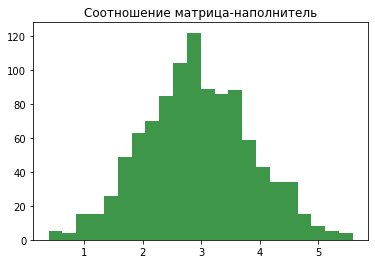

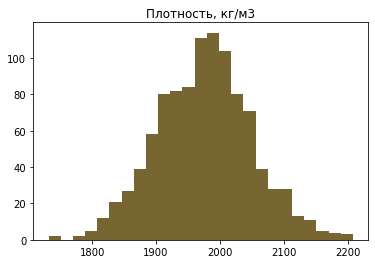

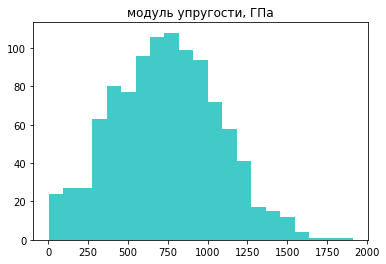

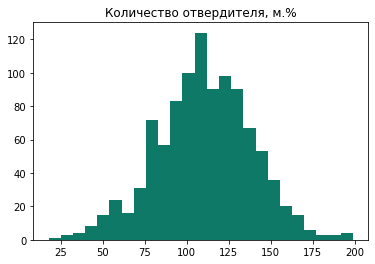

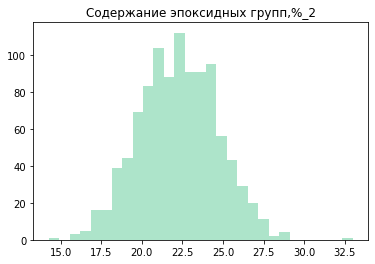

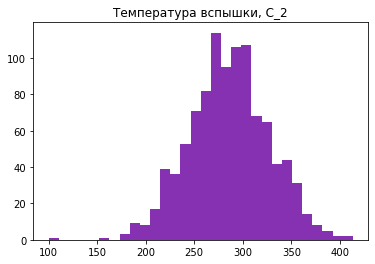

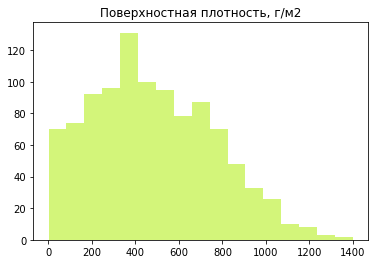

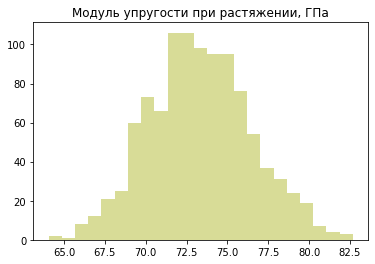

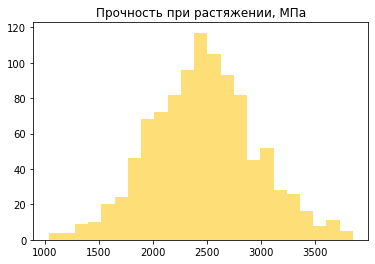

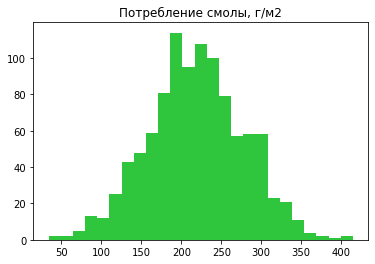

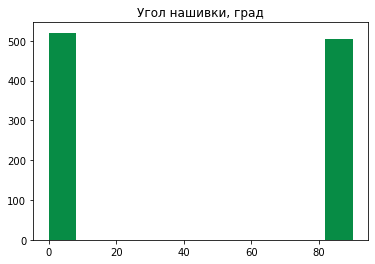

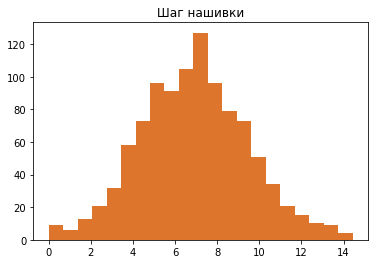

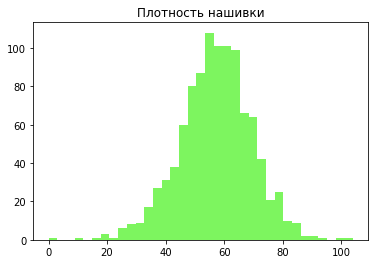

In [12]:
##  Гистограммы распределения каждой из переменных
for column in df.columns:
    plt.title(column)
    plt.hist(df[column], bins = 'auto' , color= np.random.rand(3))
    plt.show()

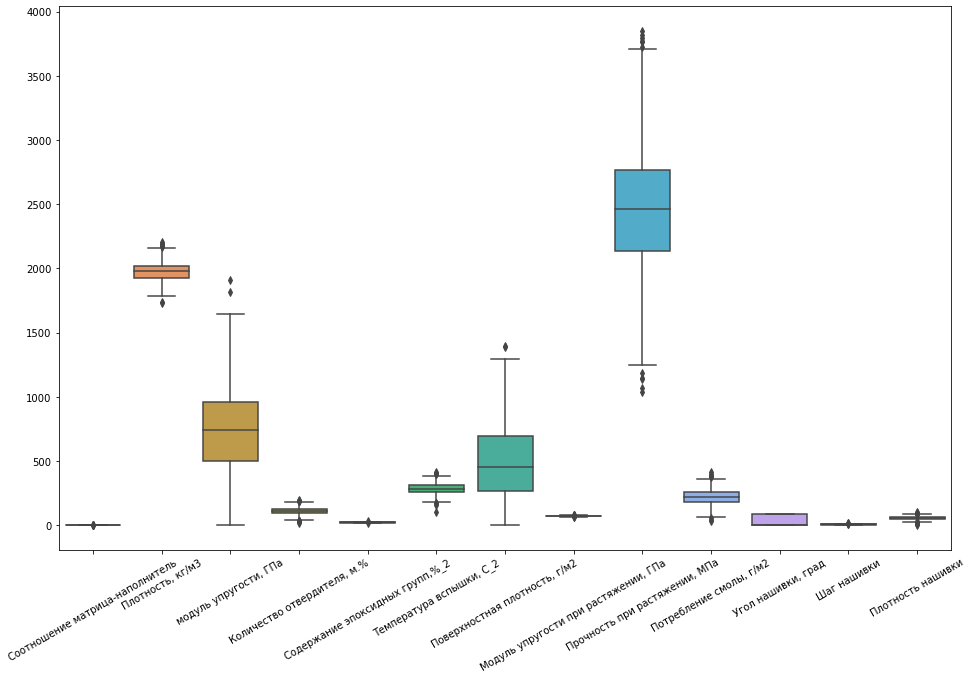

In [13]:
## Ящики с усами на одном рисунке
plt.figure(figsize=(16,10))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

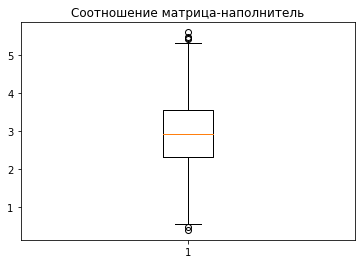

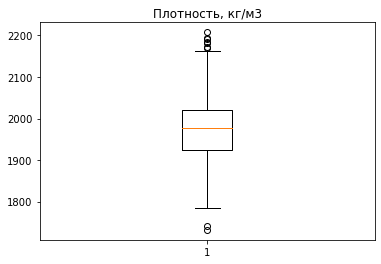

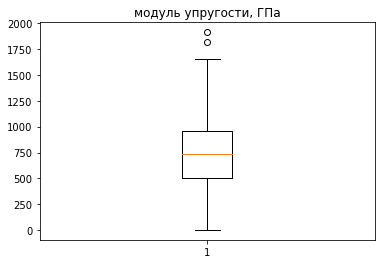

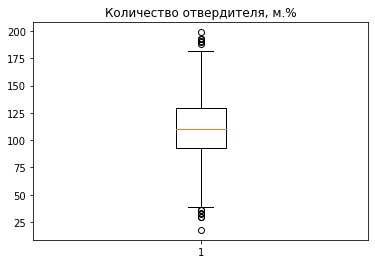

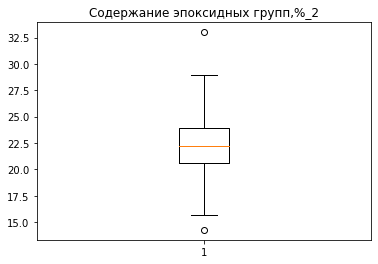

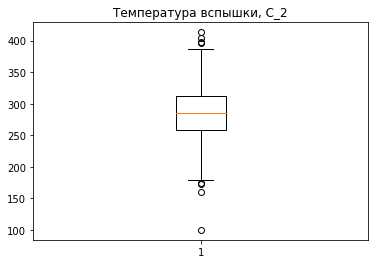

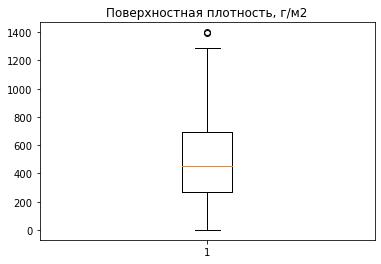

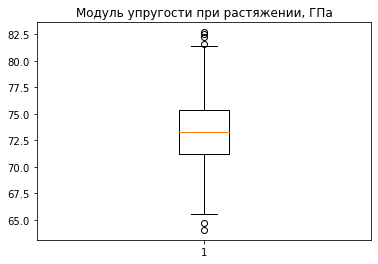

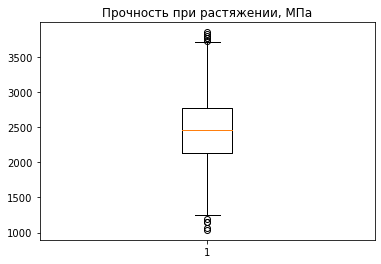

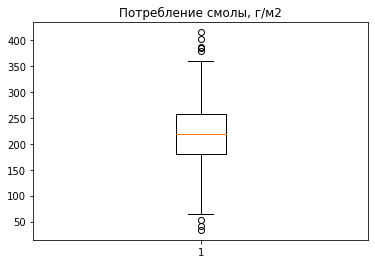

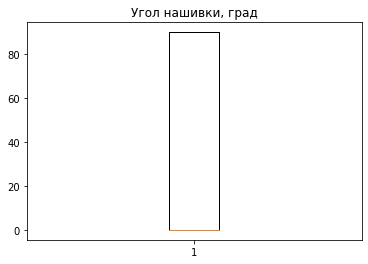

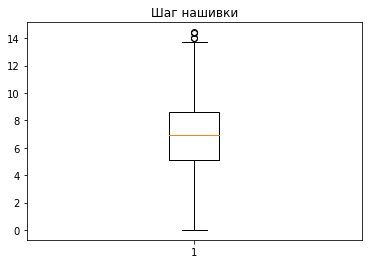

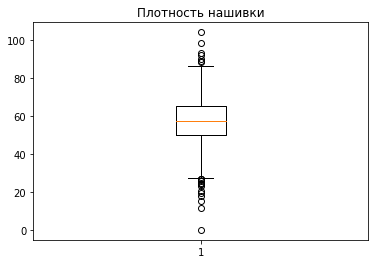

In [14]:
## Ящики с усами для каждой переменной
for column in df.columns:
    plt.title(column)
    plt.boxplot(df[column])
    plt.show()

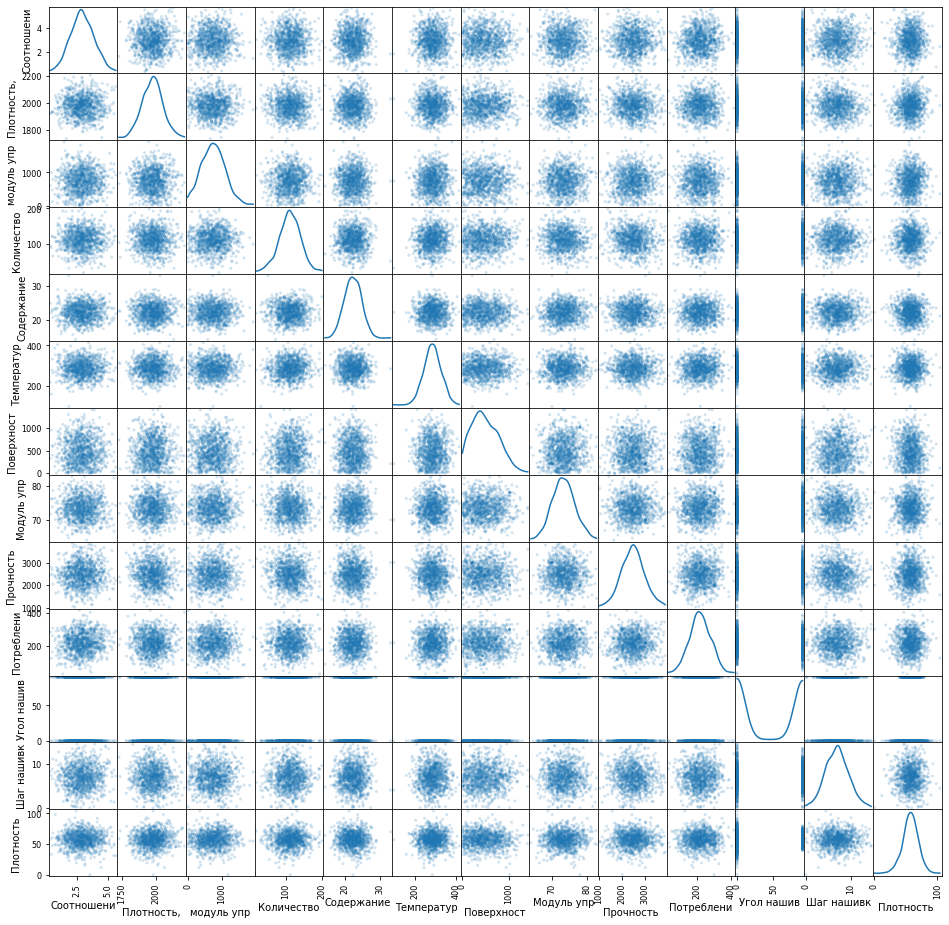

In [15]:
## Попарные графики рассеяния точек
scatter_matrix(df.rename(columns=lambda col: col[:10]), alpha=0.2, figsize=(16, 16), diagonal='kde' );

In [16]:
## Проверяем наличие пропусков
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

## Анализ и исключение выбросов


In [12]:
for col in df.columns:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

In [13]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [14]:
df = df.dropna(axis=0)
df.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [15]:
df.describe().round(2).transpose()[['std', 'mean', '50%' ,'min', 'max', ]]

,std,mean,50%,min,max
Соотношение матрица-наполнитель,0.89,2.93,2.90,0.55,5.31
"Плотность, кг/м3",70.81,1974.04,1977.26,1784.48,2161.57
"модуль упругости, ГПа",328.71,738.25,738.74,2.44,1649.42
"Количество отвердителя, м.%",27.04,110.92,111.11,38.67,181.83
"Содержание эпоксидных групп,%_2",2.39,22.21,22.18,15.70,28.96
"Температура вспышки, С_2",39.40,286.04,286.02,179.37,386.07
"Поверхностная плотность, г/м2",280.19,482.99,457.73,0.60,1291.34
"Модуль упругости при растяжении, ГПа",3.04,73.31,73.26,65.55,81.42
"Прочность при растяжении, МПа",463.84,2467.49,2457.96,1250.39,3705.67
"Потребление смолы, г/м2",57.83,217.61,218.39,63.69,359.05


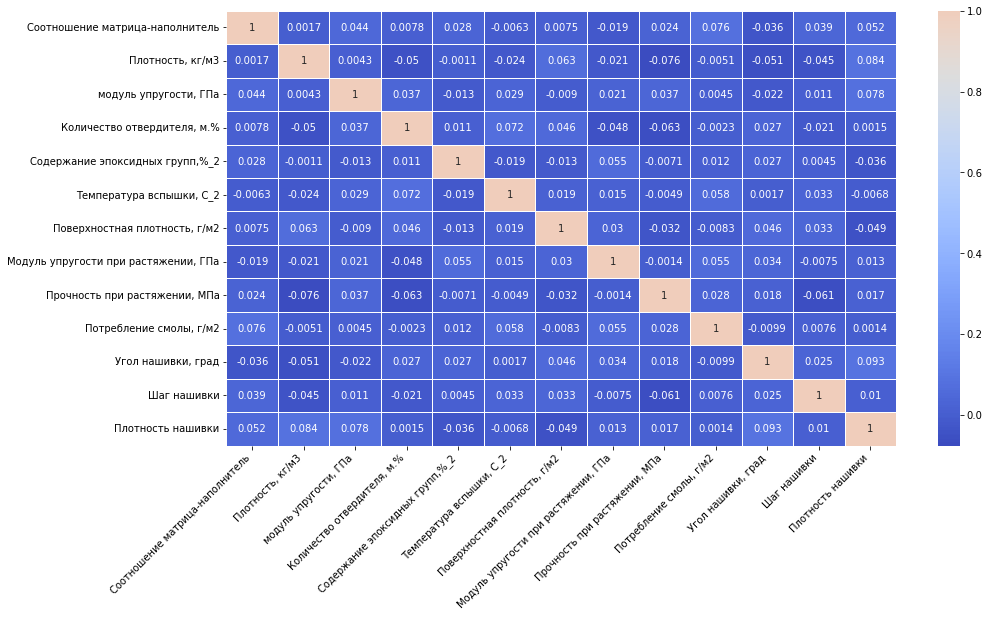

In [21]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, linewidths=1 , center= 0.84)
plt.xticks(rotation=45, ha='right');

In [22]:
df_minmax_scaler = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df) , columns = df.columns)
df_minmax_scaler.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.506083


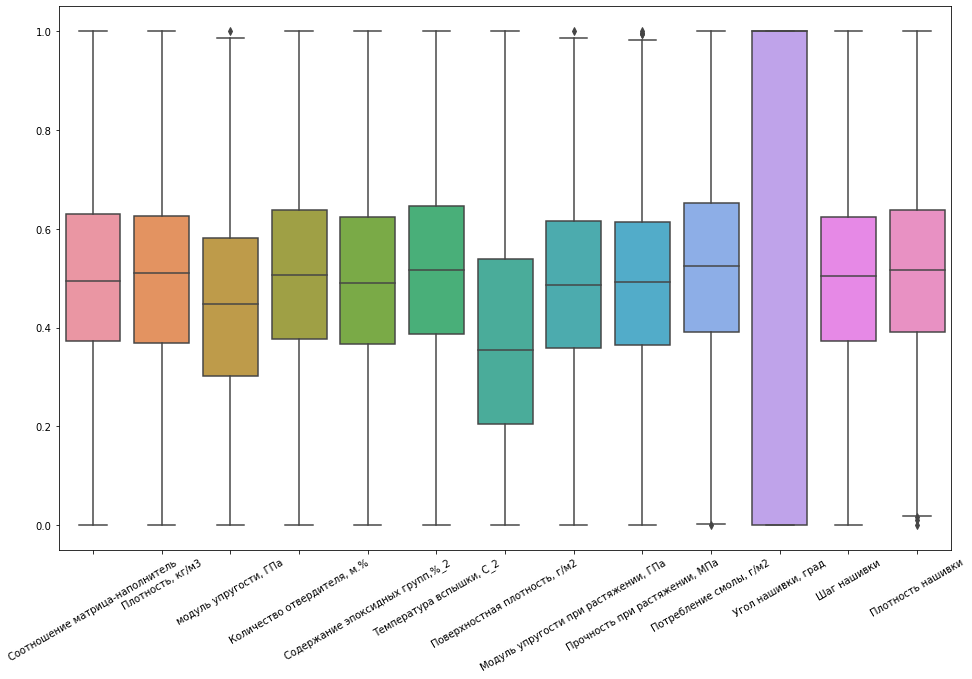

In [23]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(data=df_minmax_scaler)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

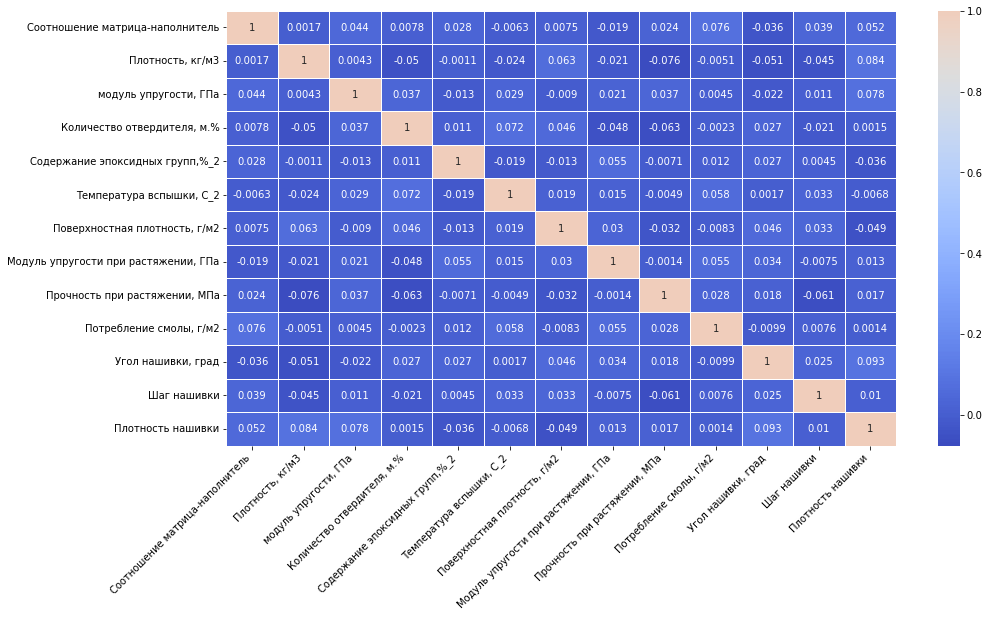

In [24]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_minmax_scaler.corr(), cmap = "coolwarm", annot = True, linewidths=1, center= 0.84)
plt.xticks(rotation=45, ha='right');

# Моделирование


In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [26]:
models = pd.DataFrame() ### Метрики поделей

#### 1. Модуль упругости при растяжении

###### 1.1 Линейная регрессия  Модуль упругости при растяжении, ГПа

In [27]:
### Ненормализованные данные
X_upr = df.copy() 

In [28]:
y_upr = X_upr.pop('Модуль упругости при растяжении, ГПа')

In [29]:
X10_upr= X_upr.drop(['Прочность при растяжении, МПа','Соотношение матрица-наполнитель'],  axis=1)

In [30]:
X_upr.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,3000.0,220.0,0.0,4.0,60.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,3000.0,220.0,0.0,5.0,57.0


In [31]:
X10_upr.head(3)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0.0,4.0,60.0
3.0,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0.0,5.0,47.0
4.0,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0.0,5.0,57.0


In [32]:
y_upr.head(3)

1.0    70.0
3.0    70.0
4.0    70.0
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [33]:
### При построении моделей провести поиск гиперпараметров модели с помощью
### поиска по сетке с перекрестной проверкой, количество блоков равно 10

lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)


In [34]:
### При построении модели необходимо 30% данных оставить на тестирование
### модели, на остальных происходит обучение моделей.

### 12 входных параметров, ненормализованные данные
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(X_upr, y_upr, test_size=0.3, random_state=1)

GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [35]:
lr_upr = GSCV_lr_upr.best_estimator_

In [36]:
models = models.append(pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)).round(3), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3),
   'Comment': '12 входных параметров, ненормализованные данные'
}, index=['Модуль упругости при растяжении']))

In [37]:
### 10 входных параметров, ненормализованные данные

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(X10_upr, y_upr, test_size=0.3, random_state=1)

GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [38]:
lr_upr = GSCV_lr_upr.best_estimator_

In [39]:
models = models.append(pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)).round(3), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3),
   'Comment': '10 входных параметров, ненормализованные данные'
}, index=['Модуль упругости при растяжении']))
models

,Model,MAE,R2 score,Comment
Модуль упругости при растяжении,LinearRegression_upr,2.546,-0.021,"12 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,2.545,-0.019,"10 входных параметров, ненормализованные данные"


In [40]:
### Нормализованные данные

X_upr = df_minmax_scaler.copy() 

In [41]:
y_upr = X_upr.pop('Модуль упругости при растяжении, ГПа')

In [42]:
X10_upr= X_upr.drop(['Прочность при растяжении, МПа','Соотношение матрица-наполнитель'],  axis=1)

In [43]:
X_upr.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.71259,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.71259,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.71259,0.529221,0.0,0.362355,0.506083


In [44]:
X10_upr.head(3)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.529221,0.0,0.289334,0.557156
1,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.529221,0.0,0.362355,0.335840
2,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.529221,0.0,0.362355,0.506083


In [45]:
y_upr.head(3)

0    0.280303
1    0.280303
2    0.280303
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [46]:
### При построении модели необходимо 30% данных оставить на тестирование
### модели, на остальных происходит обучение моделей.

### 12 входных параметров, нормализованные данные
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(X_upr, y_upr, test_size=0.3, random_state=1)

GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [47]:
lr_upr = GSCV_lr_upr.best_estimator_

In [48]:
models = models.append(pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)).round(3), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3),
   'Comment': '12 входных параметров, нормализованные данные'
}, index=['Модуль упругости при растяжении']))
models

,Model,MAE,R2 score,Comment
Модуль упругости при растяжении,LinearRegression_upr,2.546,-0.021,"12 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,2.545,-0.019,"10 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.161,-0.021,"12 входных параметров, нормализованные данные"


In [49]:
### 10 входных параметров, нормализованные данные
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(X10_upr, y_upr, test_size=0.3, random_state=1)

GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [50]:
lr_upr = GSCV_lr_upr.best_estimator_

In [51]:
models = models.append(pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)).round(3), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3),
   'Comment': '10 входных параметров, нормализованные данные'
}, index=['Модуль упругости при растяжении']))
models

,Model,MAE,R2 score,Comment
Модуль упругости при растяжении,LinearRegression_upr,2.546,-0.021,"12 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,2.545,-0.019,"10 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.161,-0.021,"12 входных параметров, нормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.160,-0.019,"10 входных параметров, нормализованные данные"


In [52]:
#### 1.2 Случайный лес

In [53]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}

In [54]:
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, y_train_upr)
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan -0.012    nan -0.01     nan    nan    nan    nan]
  warnings.warn(


{'n_estimators': 220,
 'min_samples_split': 45,
 'min_samples_leaf': 7,
 'max_depth': 2,
 'criterion': 'poisson',
 'bootstrap': 'False'}

In [55]:
models = models.append(pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, RSCV_rfr_upr.predict(X_test_upr)).round(3), 
   'R2 score': RSCV_rfr_upr.score(X_test_upr, y_test_upr).round(3),
   'Comment': '10 входных параметров, нормализованные данные'
}, index=['Модуль упругости при растяжении']))

In [56]:
models.sort_index()

,Model,MAE,R2 score,Comment
Модуль упругости при растяжении,LinearRegression_upr,2.546,-0.021,"12 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,2.545,-0.019,"10 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.161,-0.021,"12 входных параметров, нормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.160,-0.019,"10 входных параметров, нормализованные данные"
Модуль упругости при растяжении,RandomForestRegressor_upr,0.162,-0.033,"10 входных параметров, нормализованные данные"


##### Сохранение подели в файл

In [58]:
import pickle

In [60]:
pkl_filename = '.\\models\RSCV_rfr_upr.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(RSCV_rfr_upr, file)

In [75]:
X_test_upr.iloc[:1]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
386,0.781616,0.312088,0.27006,0.686552,0.214688,0.311714,0.619993,0.0,0.284227,0.269145


In [70]:
X_test_upr.head(3)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
386,0.781616,0.312088,0.270060,0.686552,0.214688,0.311714,0.619993,0.0,0.284227,0.269145
41,0.341828,0.498174,0.732806,0.647075,0.462590,0.201633,0.624846,0.0,0.556313,0.107221
725,0.414745,0.492458,0.486160,0.600314,0.442220,0.619199,0.252419,1.0,0.554320,0.429274


In [76]:
RSCV_rfr_upr.predict(X_test_upr.iloc[:1])

array([0.483])

In [79]:
RSCV_rfr_upr.predict([[0.781616, 0.312088, 0.27006, 0.686552, 0.214688, 0.311714, 0.619993, 0.0, 0.284227, 0.269145],])

array([0.483])

In [80]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [81]:
pickle_model.predict([[0.781616, 0.312088, 0.27006, 0.686552, 0.214688, 0.311714, 0.619993, 0.0, 0.284227, 0.269145],])

array([0.483])

#### 2. Прочность при растяжении

###### 2.1 Линейная регрессия  Прочность при растяжении, МПа

In [83]:
### Ненормализованные данные
X_prc = df.copy()

In [84]:
y_prc = X_prc.pop('Прочность при растяжении, МПа')

In [85]:
X10_prc= X_prc.drop(['Модуль упругости при растяжении, ГПа','Соотношение матрица-наполнитель'],  axis=1)

In [86]:
X_prc.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,220.0,0.0,4.0,60.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,220.0,0.0,5.0,57.0


In [87]:
X10_prc.head(3)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0.0,4.0,60.0
3.0,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0.0,5.0,47.0
4.0,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0.0,5.0,57.0


In [88]:
y_prc.head(3)

1.0    3000.0
3.0    3000.0
4.0    3000.0
Name: Прочность при растяжении, МПа, dtype: float64

In [89]:
### При построении моделей провести поиск гиперпараметров модели с помощью
### поиска по сетке с перекрестной проверкой, количество блоков равно 10

lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_prc = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)


In [90]:
### При построении модели необходимо 30% данных оставить на тестирование
### модели, на остальных происходит обучение моделей.

### 12 входных параметров, ненормализованные данные
X_train_prc, X_test_prc, y_train_prc, y_test_prc = train_test_split(X_prc, y_prc, test_size=0.3, random_state=1)

GSCV_lr_prc.fit(X_train_prc, y_train_prc)
GSCV_lr_prc.best_params_

{'fit_intercept': 'True'}

In [91]:
lr_prc = GSCV_lr_prc.best_estimator_

In [92]:
models = models.append(pd.DataFrame({
   'Model': 'LinearRegression_prc', 
   'MAE': mean_absolute_error(y_test_prc, lr_prc.predict(X_test_prc)).round(3), 
   'R2 score': lr_prc.score(X_test_prc, y_test_prc).round(3),
   'Comment': '12 входных параметров, ненормализованные данные'
}, index=['Прочность при растяжении, МПа']))

In [93]:
### 10 входных параметров, ненормализованные данные

X_train_prc, X_test_prc, y_train_prc, y_test_prc = train_test_split(X10_prc, y_prc, test_size=0.3, random_state=1)

GSCV_lr_prc.fit(X_train_prc, y_train_prc)
GSCV_lr_prc.best_params_

{'fit_intercept': 'True'}

In [94]:
lr_prc = GSCV_lr_prc.best_estimator_

In [95]:
models = models.append(pd.DataFrame({
   'Model': 'LinearRegression_prc', 
   'MAE': mean_absolute_error(y_test_prc, lr_prc.predict(X_test_prc)).round(3), 
   'R2 score': lr_prc.score(X_test_prc, y_test_prc).round(3),
   'Comment': '10 входных параметров, ненормализованные данные'
}, index=['Прочность при растяжении, МПа']))
models

,Model,MAE,R2 score,Comment
Модуль упругости при растяжении,LinearRegression_upr,2.546,-0.021,"12 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,2.545,-0.019,"10 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.161,-0.021,"12 входных параметров, нормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.160,-0.019,"10 входных параметров, нормализованные данные"
Модуль упругости при растяжении,RandomForestRegressor_upr,0.162,-0.033,"10 входных параметров, нормализованные данные"
"Прочность при растяжении, МПа",LinearRegression_prc,370.543,-0.021,"12 входных параметров, ненормализованные данные"
"Прочность при растяжении, МПа",LinearRegression_prc,368.229,-0.005,"10 входных параметров, ненормализованные данные"


#### 2.2 Метод К ближайших соседей Прочность при растяжении, МПа

In [96]:
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knr_prc = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_prc.fit(X_train_prc, y_train_prc)
GSCV_knr_prc.best_params_

{'algorithm': 'auto', 'n_neighbors': 61, 'weights': 'distance'}

In [97]:
models = models.append(pd.DataFrame({
   'Model': 'KNeighborsRegressor_prc',
   'MAE': mean_absolute_error(y_test_prc, GSCV_knr_prc.predict(X_test_prc)).round(3), 
   'R2 score': GSCV_knr_prc.score(X_test_prc, y_test_prc).round(3),
   'Comment': '10 входных параметров, ненормализованные данные'
}, index=['Прочность при растяжении, МПа']))


In [98]:
models.sort_index()

,Model,MAE,R2 score,Comment
Модуль упругости при растяжении,LinearRegression_upr,2.546,-0.021,"12 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,2.545,-0.019,"10 входных параметров, ненормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.161,-0.021,"12 входных параметров, нормализованные данные"
Модуль упругости при растяжении,LinearRegression_upr,0.160,-0.019,"10 входных параметров, нормализованные данные"
Модуль упругости при растяжении,RandomForestRegressor_upr,0.162,-0.033,"10 входных параметров, нормализованные данные"
"Прочность при растяжении, МПа",LinearRegression_prc,370.543,-0.021,"12 входных параметров, ненормализованные данные"
"Прочность при растяжении, МПа",LinearRegression_prc,368.229,-0.005,"10 входных параметров, ненормализованные данные"
"Прочность при растяжении, МПа",KNeighborsRegressor_prc,368.097,-0.009,"10 входных параметров, ненормализованные данные"


#### 3. Соотношение матрица наполнитель
Смотри так же Отдельный ноутбук для Соотношения матрица наполнитель -   потому что sklearn не работал на ноутбуке.

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
### Ненормализованные данные
X_mn = df.copy()

In [ ]:
y_mn = X_mn.pop('Соотношение матрица-наполнитель')

In [ ]:
X10_mn= X_mn.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'],  axis=1)

In [ ]:
X_mn.head(3)

In [ ]:
X10_mn.head(3)

In [ ]:
y_mn.head(3)

In [ ]:
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X10_mn, y_mn, test_size=0.3, random_state=1)

In [ ]:
X_train_mn.shape

In [ ]:
X_test_mn.shape

In [ ]:
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(100, 100, 50, 25, 12), (144, 144, 72, 36, 12, 1), (12, 12, 12, 12, 12),
                            (144, 144, 144, 72, 72, 36, 36), ()],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [100],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [ ]:
GSCV_mlpr_mn = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_mn.fit(X_train_mn, y_train_mn)
GSCV_mlpr_mn.best_params_

In [ ]:
models = models.append(pd.DataFrame({
   'Model': 'MLPRegressor_mn', 
   'MAE': mean_absolute_error(y_test_mn, GSCV_mlpr_mn.predict(X_test_mn)).round(3), 
   'R2 score': GSCV_mlpr_mn.score(X_test_mn, y_test_mn).round(3),
   'Comment': '10 входных параметров, ненормализованные данные'
}, index=['Соотношение матрица-наполнитель']))

In [ ]:
models.sort_index()